<h1> Importing Data </h1>

In [3]:
library(tidyverse)
url1='https://drive.google.com/uc?export=download&id=1LGq5BTBDuA8hTXNmLyc1A0I6Q0ifIL6e'
players<-read_csv(url1)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
players_mean<- players|>
    summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
              min_played_hours = min(played_hours, na.rm = TRUE),
              max_played_hours = max(played_hours, na.rm = TRUE),
              missing_played_hours = round(mean(is.na(played_hours)) * 100, 2),
              mean_age = round(mean(Age, na.rm = TRUE), 2),
              min_age = min(Age, na.rm = TRUE),
              max_age = max(Age, na.rm = TRUE),
              missing_age = round(mean(is.na(Age)) * 100, 2))
players_mean

mean_played_hours,min_played_hours,max_played_hours,missing_played_hours,mean_age,min_age,max_age,missing_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0,223.1,0,21.14,9,58,1.02


<h1>(1) Introduction</h1>
In this project, we are going to predict whether the players' subscribe the Video Game based on their age and played time.

<h2> Data Description: </h2>

<h3>Summary</h3>

This project analyzes data from the players.csv dataset, which contains information about 196 individual players on a Minecraft server, including their experience level, newsletter subscriptifon status, hashed email address, playtime, name, gender, and age.

The dataset includes seven variables. The table below summarizes each variable and its type.

<h3>Variables</h3>

 Variable Name | Type | Description | Example Value |
|----------------|------|--------------|----------------|
| `experience` | Categorical (`chr`) | Player’s skill level or rank. | `Pro` |
| `subscribe` | Boolean (`lgl`) | Indicates whether the player has an active subscription (TRUE) or not (FALSE). | `TRUE` |
| `hashedEmail` | String (`chr`) | Unique anonymized identifier for each player. | `f6daba4...` |
| `played_hours` | Numeric (`dbl`) | Total number of hours the player has spent playing. | `30.3` |
| `name` | String (`chr`) | Player’s first name. | `Morgan` |
| `gender` | Categorical (`chr`) | Player’s gender identity | `male` |
| `Age` | Numeric (`dbl`) | Player’s age in years. Contains some missing values (`NA`). | `17` |

---

<h3>Summary Statistic</h3>

| Variable | Mean | Min | Max | Missing (%) |
|-----------|------|-----------|------|--------------|
| `played_hours` | *5.85* | *0* | *223.1* | 0% |
| `Age` | *21.14* | *9* | *58* | 1.02% |
---

<h3>Direct Observations and Problems</h3>

+ **Experience:** character variable. It shows the players experience level. The categories — “Amateur,” “Regular,” “Veteran,” and “Pro” — indicate increasing levels of game proficiency in that order, and it could be useful in predicting playtime

+ **subscribe:** logical variable. It indicates whether a player subscribed to the game.'True' means the player did subscribe the game, 'False' means 
the player did not subscribe the game.

+ **hashedEmail:** character variable. It is a anonnymized version of the player's email, but is not relevant for analysis.

+ **played_hours :** numeric variable. It shows the number of hours the player has spent on the game.

+ **name:** character variable. It is the display name chosen by each player in the game.

+ **gender:** character variable. It contains has many different responses, such as “Other”, “Two-Spirited”, “Prefer not to say”, etc, showing the gender of each player.

+ **Age：** numeric variable. It shows the player's age. It has some missing values, which must be handled before modelling

<h3>Other Potential Issue</h3>

- The data may not represent all types of players (for example, older players or casual players may be missing).
  
- Data by self-recording (such as age) may contain errors.

- The Age variable contains NA values. This may cause errors in many functions.

- The hashedEmail variable is not human-readable, it may be useless.

- If we want to predict subscribe, and it is not stored as a factor, we need to convert it first before running any classifier.

<h3>How the Data be Collected</h3>

<p> A research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a Minecraft serverLinks to an external site., and players' actions are recorded as they navigate through the world. </p >

<h2>Questions:</h2>

<h3>Addressing Question 1</h3>

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

<h3>The Specific Question</h3>

Can a player’s total playtime and age predict whether they subscribe to the newsletter?

<h3>Variables used</h3>

Response variable (y): subscribe

Explanatory variables (x): Age, played_hours 

<h3> How the Data Helps Address the Specific Question</h3>

This dataset provides the three information needed for this question, which are **total playtime**, **age**, and **subscription status** for each player. By focusing on these variables and removing missing values in Age, I can examine how playtime and age differ between subscribers and non-subscribers.

## wrangling step：
+ select the subscribe, Age, and played_hours variables
+ convert subscribe from a character variable into a factor

In [5]:
players_clean<- players |> mutate(subscribe = as.factor(subscribe)) |> 
select(subscribe, Age, played_hours) |>
drop_na(subscribe, Age, played_hours)
head(players_clean)

subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0


## Visualization

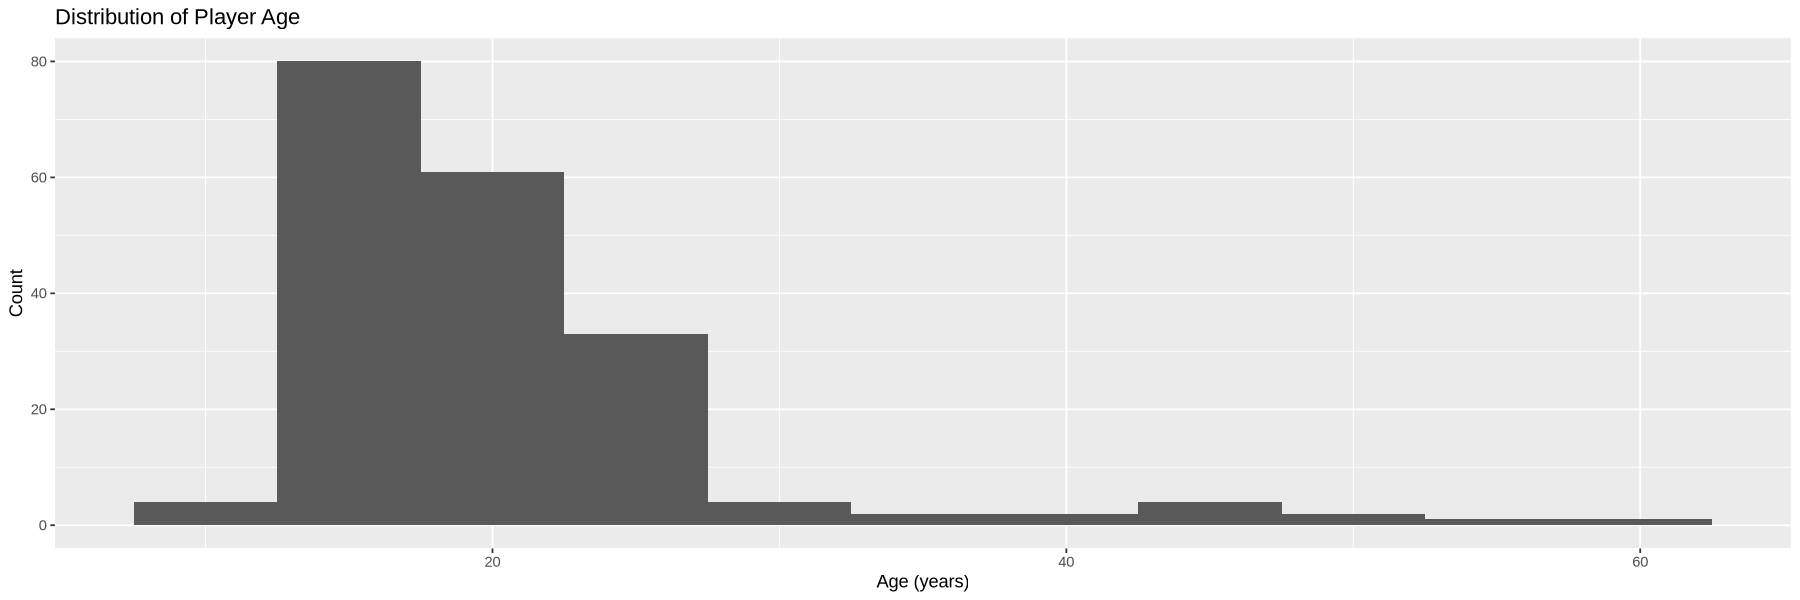

In [6]:
options(repr.plot.width = 15, repr.plot.height = 5)
Age_Distribution<- players_clean |> ggplot(aes(x = Age)) + 
geom_histogram(binwidth = 5) +
labs( title = "Distribution of Player Age", x = "Age (years)", y = "Count")
Age_Distribution

Most players are between 13 and 27 years old, with the largest concentration in the 13 to 18 age range. This may suggest that younger players are the main audience of this game. Since this age group has a larger player base, it is likely that they also make up a significant portion of the players who subscribe.


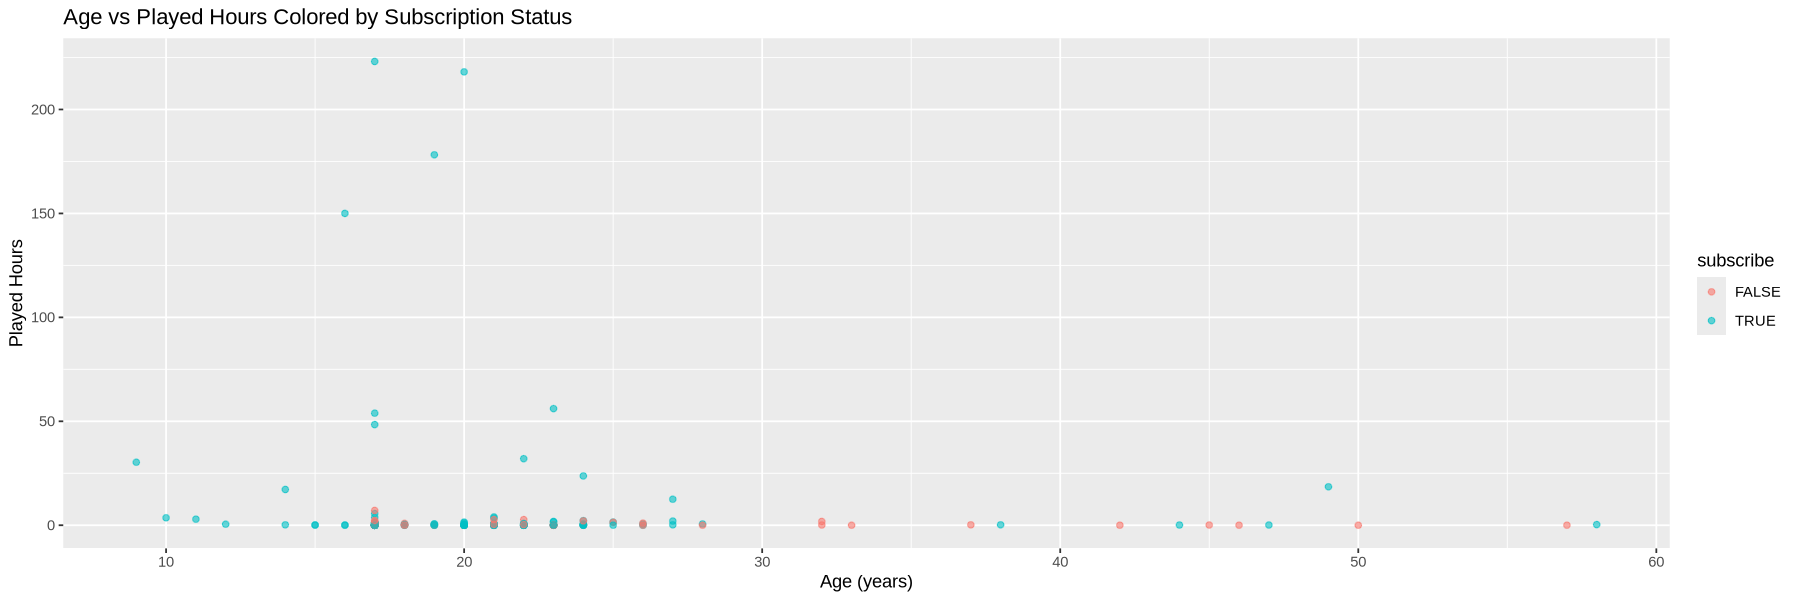

In [7]:
Age_played_hours <-players_clean |> 
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(title = "Age vs Played Hours Colored by Subscription Status",
    x = "Age (years)",
    y = "Played Hours") 
Age_played_hours

From the played_hours side, players who don’t subscribe usually have 0 hours played. But relying only on played_hours is not accurate, because some subscribed users barely play at all, and some non-subscribed users actually play for a long time. This led me to consider whether age might also influence a player’s decision to subscribe.

From the age side, both subscribed and non-subscribed players appear across almost all age groups, but most subscribed players are under 30 years old.

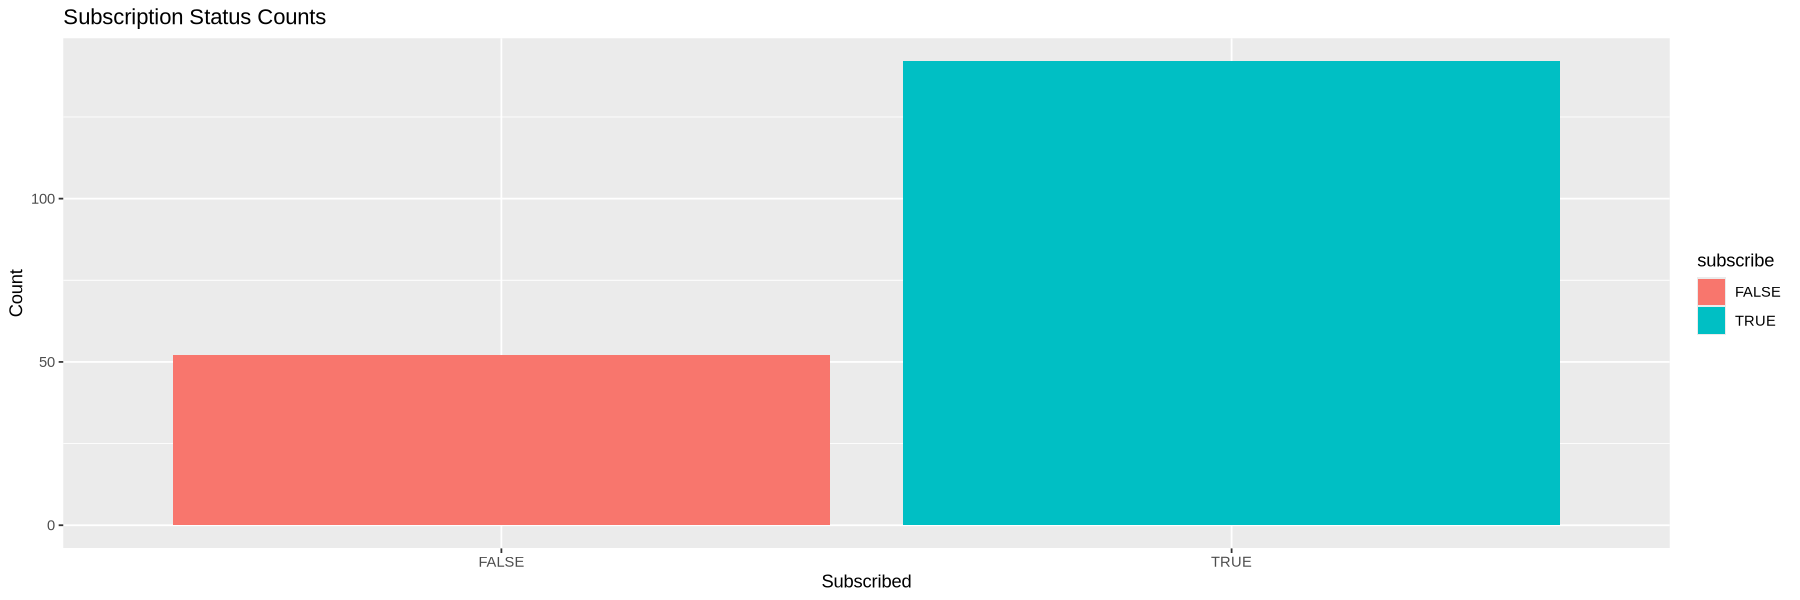

In [8]:
subscription_proportion <-players_clean |> 
  ggplot(aes(x = subscribe, fill = subscribe)) +
  geom_bar() +
  labs(title = "Subscription Status Counts", x = "Subscribed", y = "Count")
subscription_proportion


From this plot, we can see that about three out of every four players subscribe to the game. The classes are imbalance.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


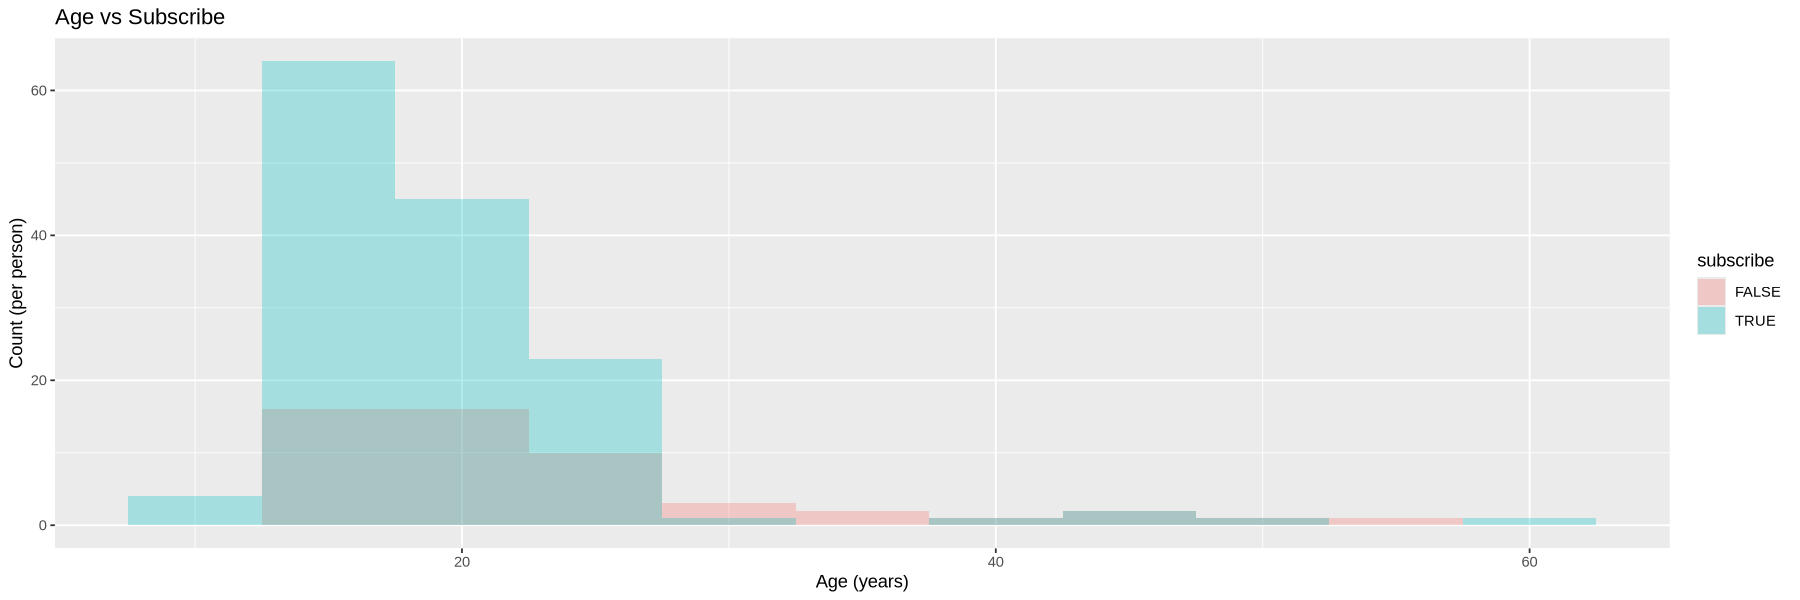

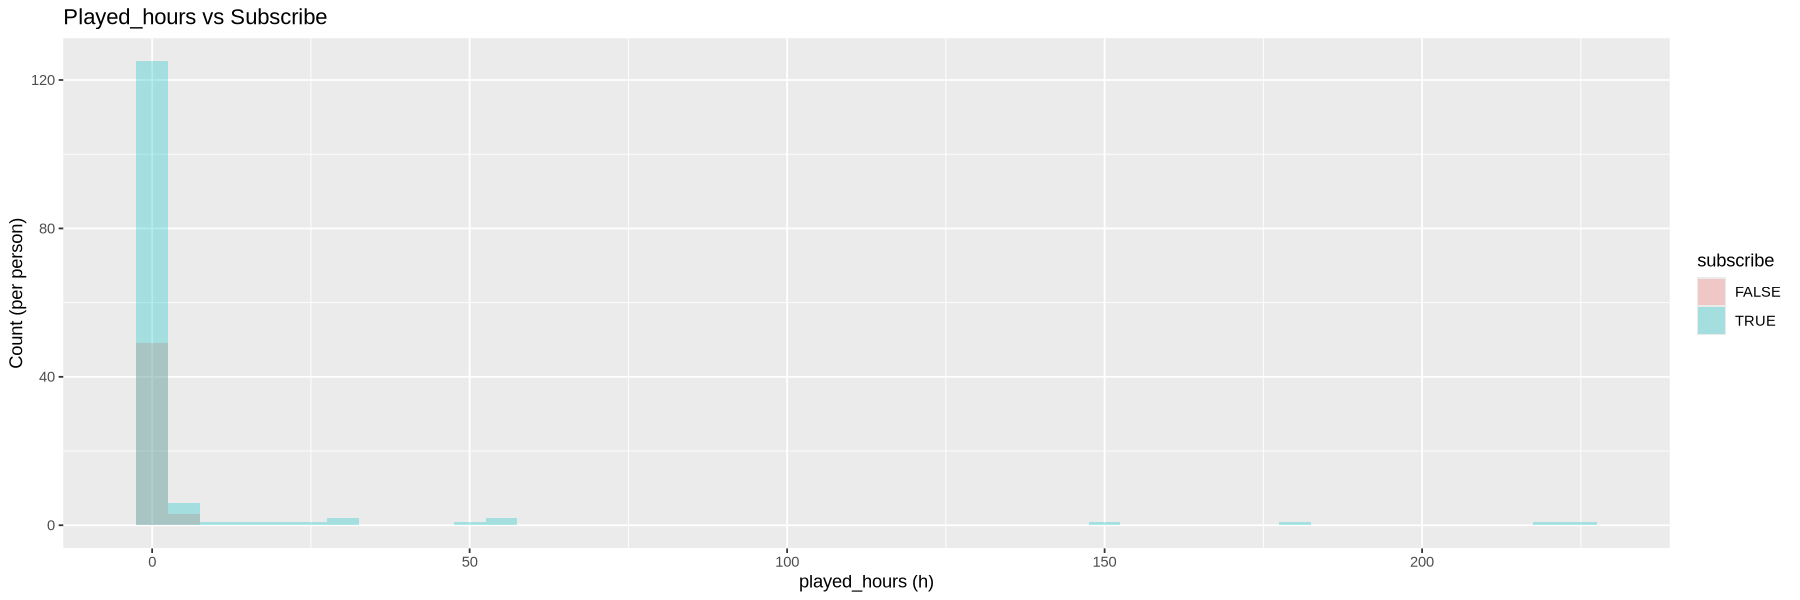

In [10]:
visualization_age_subscribe<- players|>
            ggplot(aes(x = Age, fill = subscribe)) +
            geom_histogram(position = "identity", alpha = 0.3, binwidth = 5) +
            labs(title = "Age vs Subscribe",
                 x = "Age (years)",
                 y = "Count (per person)")
visualization_age_subscribe

visualization_playtime_subscribe<- players|>
            ggplot(aes(x = played_hours, fill = subscribe)) +
            geom_histogram(position = "identity", alpha = 0.3, binwidth = 5) +
            labs(title = "Played_hours vs Subscribe",
                 x = "played_hours (h)",
                 y = "Count (per person)")
visualization_playtime_subscribe

By applying the histogram, the graphs show the distribution of age and playtime for whether players have subscribed or not. We can see that most subscribers are between 13–17 years old and have 0–5 total played hours. These noticable patterns have strong distribution between both graphs.